In [1]:
import numpy as np
import ornstein_uhlenbeck as ou
import matplotlib.pyplot as plt

In [6]:
def simulate_ou(init_x, mu, sigma, theta, t):
    T = len(t);
    dt = t[1:] - t[:-1];
    x = np.zeros_like(t);
    x[0] = init_x;
    #exp_minus_lambda_deltat = np.exp(-theta * dt);
    #dWt = np.sqrt((1-np.exp(-2*l* deltat))/(2*l)) * np.random.normal(0,1,T);
    
    for i in range(1,T):
        exp_minus_lambda_deltat = np.exp(-theta * dt[i-1]);
        dWt = np.sqrt((1-np.exp(-2*theta*dt[i-1]))/(2*theta)) * np.random.normal(0,1);
        x[i] = exp_minus_lambda_deltat * x[i-1] + \
            (1 - exp_minus_lambda_deltat) * mu + sigma * dWt;
    return x

In [26]:
#  Code our distribution function
def OU(x1, x2, dt, mu, sigma, theta):
    sigma0 = sigma**2 * (1 - np.exp(-2*theta*dt)) / (2 * theta)
    sigma0 = np.sqrt( sigma0 )
    
    prefactor = 1 / np.sqrt(2 * np.pi * sigma0**2)
    
    f =  prefactor * np.exp( -(x2 - x1 * np.exp(-theta*dt) - \
                    mu * (1-np.exp(-theta*dt)) )**2 / (2 * sigma0**2) )
    
    return f

#  Calculate the negative of the log likelihood
def log_likelihood_OU(p, X, dt):
    
    mu = p[0]
    sigma = p[1]
    theta = p[2]
    
    N = X.size
    
    f = np.zeros( (N-1, ) )
    
    for i in range( 1, N ):
        x2 = X[i]
        x1 = X[i-1]
        
        f[i-1] = OU(x1, x2, dt[i-1], mu, sigma, theta)
    
    ind = np.where(f == 0)
    ind = ind[0]
    if ind.size > 0:
        f[ind] = 10**-8
        
    f = np.log(f)
    f = np.sum(f)
        
    return -f

def constraint1(p):
    return p[1]

def constraint2(p):
    return p[2]


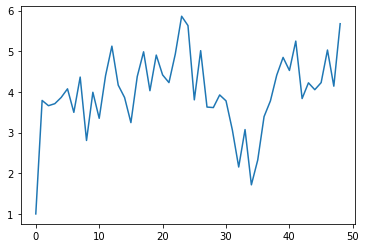

In [33]:
# same sampling intervals
t = np.arange(1,50, dtype=float)
x = simulate_ou(1, 4, 1, 0.9, t)
plt.plot(x)

In [34]:
from scipy.optimize import minimize
#  Initial guess for our parameters
p0 = [1, 1, 1]

cons = ({'type':'ineq', 'fun': constraint1},
         {'type':'ineq', 'fun': constraint2})
#  Call minimize
minimize(log_likelihood_OU, p0, args = (x, t[1:]-t[:-1]), constraints=cons)

     fun: 54.60288721494395
     jac: array([ 2.28881836e-05, -1.02996826e-04,  2.57492065e-05])
 message: 'Optimization terminated successfully'
    nfev: 93
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([4.13319038, 1.0797299 , 0.82792095])

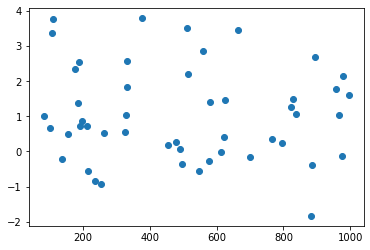

In [37]:
# unequal sampling intervals
t = np.unique(np.sort(np.random.randint(1,1000,50))).astype(float)
x = simulate_ou(1, 1, 1, 0.2, t)
plt.plot(t,x, 'o')

In [38]:
from scipy.optimize import minimize
#  Initial guess for our parameters
p0 = [1, 1, 1]

cons = ({'type':'ineq', 'fun': constraint1},
         {'type':'ineq', 'fun': constraint2})

#  Call minimize
minimize(log_likelihood_OU, p0, args = (x, t[1:]-t[:-1]), constraints=cons)

     fun: 80.53359655218088
     jac: array([-0.000494  , -0.0003891 , -0.00032234])
 message: 'Optimization terminated successfully'
    nfev: 159
     nit: 34
    njev: 34
  status: 0
 success: True
       x: array([1.00160936, 1.04937774, 0.30196969])